In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import importlib
import sys
sys.path.insert(1, '../')
import qtm.base, qtm.constant, qtm.ansatz, qtm.fubini_study, qtm.progress_bar
importlib.reload(qtm.base)
importlib.reload(qtm.constant)
import cmath
import qtm.qcompilation
import numpy as np
import types

Step: 100%|██████████| 100/100 [24:50<00:00, 14.90s/it]


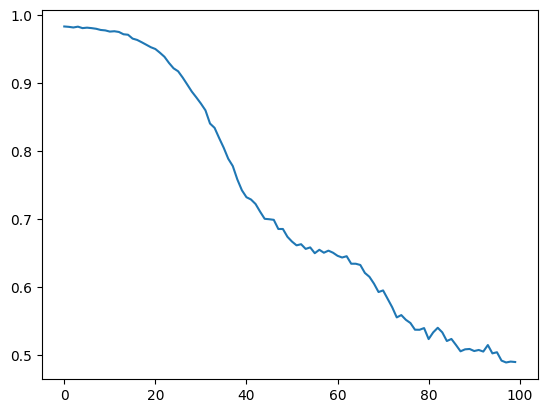

In [2]:
import qtm.base, qtm.constant, qtm.ansatz, qtm.fubini_study, qtm.progress_bar
importlib.reload(qtm.base)
importlib.reload(qtm.constant)
import cmath
import qtm.qcompilation
import numpy as np
import types

num_qubits = 3
num_layers = 2
thetas = np.zeros(2*num_qubits*num_layers)

qng_compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_AMEchecker_polygongraph,
    vdagger = qtm.state.create_AME_state(num_qubits).inverse(),
    optimizer = 'qng_adam',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
qng_compiler.fit(num_steps = 100, verbose = 1)

plt.plot(qng_compiler.loss_values)

In [3]:
num_qubits = 3
num_layers = 2
thetas = np.zeros(2*num_qubits*num_layers)

adam_compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_AMEchecker_polygongraph,
    vdagger = qtm.state.create_AME_state(num_qubits).inverse(),
    optimizer = 'adam',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
adam_compiler.fit(num_steps = 100, verbose = 1)

plt.plot(adam_compiler.loss_values)

Step:  28%|██▊       | 28/100 [06:48<17:31, 14.61s/it]


Step: 100%|██████████| 100/100 [25:14<00:00, 15.15s/it]


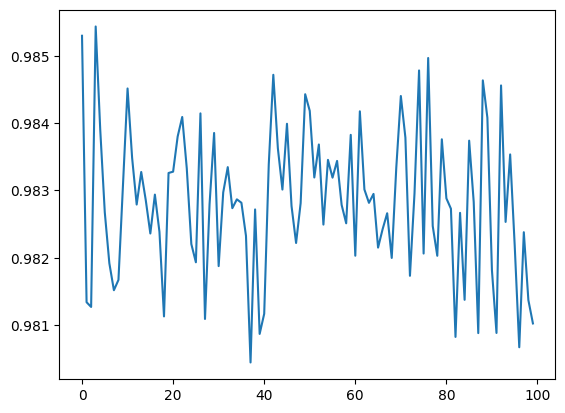

In [10]:
num_qubits = 3
num_layers = 2
thetas = np.zeros(2*num_qubits*num_layers)

sgd_compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_AMEchecker_polygongraph,
    vdagger = qtm.state.create_AME_state(num_qubits).inverse(),
    optimizer = 'sgd',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
sgd_compiler.fit(num_steps = 100, verbose = 1)

plt.plot(sgd_compiler.loss_values)

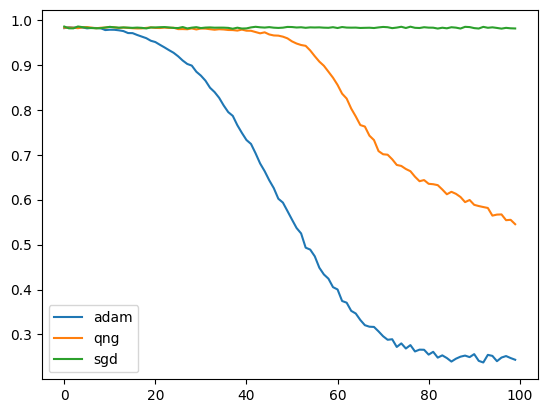

In [17]:
iterations = list(range(0,100))
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
ax.plot(iterations,adam_compiler.loss_values, label = "adam")
ax.plot(iterations,qng_compiler.loss_values, label = "qng")
ax.plot(iterations,sgd_compiler.loss_values, label = "sgd")
ax.legend()
fig.savefig("/home/fptu/UC-VQA/images/AME_polygon.png")


<Figure size 640x480 with 0 Axes>